In [1]:
import pandas as pd
import numpy as np

# loading in cleaned dataset from Github
url = "https://raw.githubusercontent.com/chenzaiproject/capstone/refs/heads/main/data/merged_nhanes_data.csv"
df = pd.read_csv(url)

print(df.shape)
df.head()

(2017, 49)


,Unnamed: 0,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR,BMXBMI,BMXHIP,BMXHT,BMXWAIST,...,HUQ042,HUQ055,HUQ090,HIQ011,HIQ032A,HIQ032B,HIQ032D,HIQ032F,HIQ032H,HIQ032I
0,0,130378.0,1.0,43.0,5.0,5.00,27.0,102.9,179.5,98.3,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
1,1,130379.0,1.0,66.0,5.0,5.00,33.5,112.4,174.2,114.7,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
2,2,130380.0,2.0,44.0,3.0,1.41,29.7,98.0,152.9,93.5,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
3,3,130386.0,1.0,34.0,4.0,1.33,30.2,110.6,173.3,106.1,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
4,4,130394.0,1.0,51.0,5.0,5.00,24.4,99.4,177.3,92.1,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


In [2]:
df.info()

invalid_placeholder = 5.397605346934028e-79
df.replace(invalid_placeholder, np.nan, inplace=True)

# some strings need to be converted into regular strings (for physical activity frequency)
for col in df.columns:
    if df[col].dtype == object:
        df[col] = df[col].apply(lambda x: x.decode('utf-8') if isinstance(x, bytes) else x)

# checking amount of missing values per column
missing_ratio = df.isnull().mean().sort_values(ascending=False)
print("Columns with more than 30% missing:")
print(missing_ratio[missing_ratio > 0.3])

# dropping columns with more than 30% missing
df_cleaned = df.drop(columns=missing_ratio[missing_ratio > 0.3].index)

# separating numerical and categorical columns
numerical_cols = df_cleaned.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns.tolist()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 49 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2017 non-null   int64  
 1   SEQN        2017 non-null   float64
 2   RIAGENDR    2017 non-null   float64
 3   RIDAGEYR    2017 non-null   float64
 4   DMDEDUC2    1946 non-null   float64
 5   INDFMPIR    1950 non-null   float64
 6   BMXBMI      2006 non-null   float64
 7   BMXHIP      1969 non-null   float64
 8   BMXHT       2012 non-null   float64
 9   BMXWAIST    1978 non-null   float64
 10  BMXWT       2008 non-null   float64
 11  BPXOSY1     2017 non-null   float64
 12  BPXOSY2     2017 non-null   float64
 13  BPXOSY3     2017 non-null   float64
 14  BPXODI1     2017 non-null   float64
 15  BPXODI2     2017 non-null   float64
 16  BPXODI3     2017 non-null   float64
 17  SYSBP       2017 non-null   float64
 18  DIABP       2017 non-null   float64
 19  WTSAF2YR    2017 non-null  

In [3]:
from sklearn.impute import SimpleImputer

# imputing using median for numeric variables
num_imputer = SimpleImputer(strategy='median')
df_cleaned[numerical_cols] = num_imputer.fit_transform(df_cleaned[numerical_cols])

# using mode for categorical variables
cat_imputer = SimpleImputer(strategy='most_frequent')
df_cleaned[categorical_cols] = cat_imputer.fit_transform(df_cleaned[categorical_cols])

df_cleaned.head()

,Unnamed: 0,SEQN,RIAGENDR,RIDAGEYR,DMDEDUC2,INDFMPIR,BMXBMI,BMXHIP,BMXHT,BMXWAIST,...,HUQ042,HUQ055,HUQ090,HIQ011,HIQ032A,HIQ032B,HIQ032D,HIQ032F,HIQ032H,HIQ032I
0,0.0,130378.0,1.0,43.0,5.0,5.00,27.0,102.9,179.5,98.3,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
1,1.0,130379.0,1.0,66.0,5.0,5.00,33.5,112.4,174.2,114.7,...,1.0,1.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0
2,2.0,130380.0,2.0,44.0,3.0,1.41,29.7,98.0,152.9,93.5,...,1.0,1.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
3,3.0,130386.0,1.0,34.0,4.0,1.33,30.2,110.6,173.3,106.1,...,1.0,2.0,2.0,1.0,2.0,2.0,2.0,2.0,8.0,2.0
4,4.0,130394.0,1.0,51.0,5.0,5.00,24.4,99.4,177.3,92.1,...,1.0,2.0,2.0,1.0,1.0,2.0,2.0,2.0,2.0,2.0


In [4]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# dropping unique identifier columns
df_model = df_cleaned.drop(columns=["Unnamed: 0", "SEQN"])

# one hot encoding categorical features: amount of physical activity (moderate and light) 
categorical_features = ['PAD790U', 'PAD810U']
numerical_features = [col for col in df_model.columns if col not in categorical_features]

# preprocessing data
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)  
    ]
)

X_processed = preprocessor.fit_transform(df_model)

print(X_processed.shape)

(2017, 51)


After processing the dataset, we used a BIC/AIC graph to determine the best number of clusters for the data. 

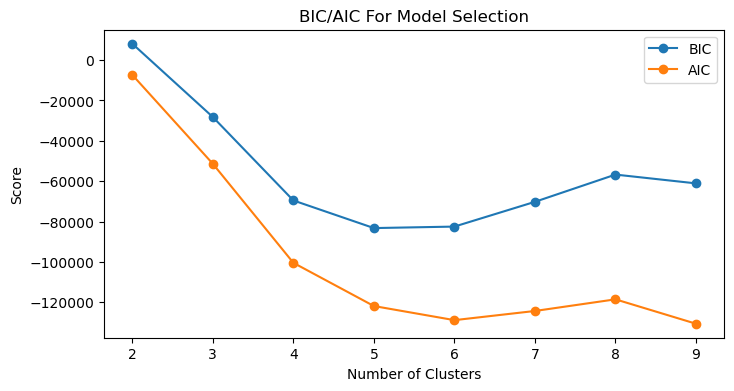

In [5]:
from sklearn.mixture import GaussianMixture
import matplotlib.pyplot as plt
import seaborn as sns

# trying different cluster numbers
n_components = range(2, 10)
bics = []
aics = []

for k in n_components:
    gmm = GaussianMixture(n_components=k, random_state=42)
    gmm.fit(X_processed)
    bics.append(gmm.bic(X_processed))
    aics.append(gmm.aic(X_processed))

# plotting BIC/AIC to choose cluster number
plt.figure(figsize=(8, 4))
plt.plot(n_components, bics, label='BIC', marker='o')
plt.plot(n_components, aics, label='AIC', marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.title("BIC/AIC For Model Selection")
plt.legend()
plt.show()


In [6]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# extracting just the columns for health indicators and standardizing the data
health_cols = ['BMXBMI','BMXHIP','BMXHT','BMXWAIST','BMXWT','BPXOSY1',
                                 'BPXOSY2','BPXOSY3','BPXODI1','BPXODI2','BPXODI3','SYSBP',
                                 'DIABP','WTSAF2YR','LBXGLU','WTPH2YR','LBDHDD','LBXVIDMS',
                                 'LBXVD2MS','LBXVD3MS','LBXVE3MS','LBXGH','LBXTC']

scaler = StandardScaler()
X_bio = scaler.fit_transform(df_cleaned[health_cols])

gmm = GaussianMixture(n_components=6, random_state=42)
df_cleaned['Cluster'] = gmm.fit_predict(X_bio)


Text(0.5, 1.0, 'PCA Plot for All Health Metrics')

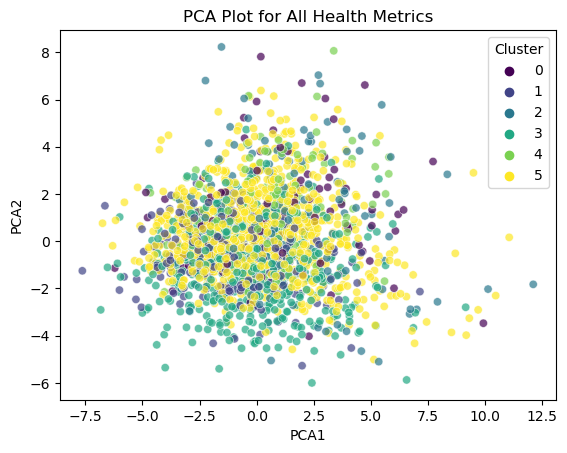

In [7]:
# clusters include all health indicators

# using PCA to visualize clusters in 2D
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_bio)
df_cleaned['PCA1'] = X_pca[:, 0]
df_cleaned['PCA2'] = X_pca[:, 1]

sns.scatterplot(
    data=df_cleaned,
    x='PCA1', y='PCA2',
    hue='Cluster',
    palette='viridis', alpha=0.7
).set_title('PCA Plot for All Health Metrics')

In [8]:
from sklearn.metrics import silhouette_score, davies_bouldin_score

# evaluating the clusters
silhouette = silhouette_score(X_bio, gmm.fit_predict(X_bio))
db_index = davies_bouldin_score(X_bio, gmm.fit_predict(X_bio))
print("Silhouette Score: ", silhouette)
print("Davies Bouldin Index: ", db_index)

Silhouette Score:  -0.027422367100853443
Davies Bouldin Index:  3.9494820417150565


As you can see, there is no separation between the six clusters, as evidenced by the two scores. To try and mitigate this, we split up the data into the different health categories (heart health, diabetes and obesity risk). The best amount of separation we got was with the body measurement data but overall the clusters were not distinct. 

Text(0.5, 1.0, 'PCA Plot for Heart Health Data')

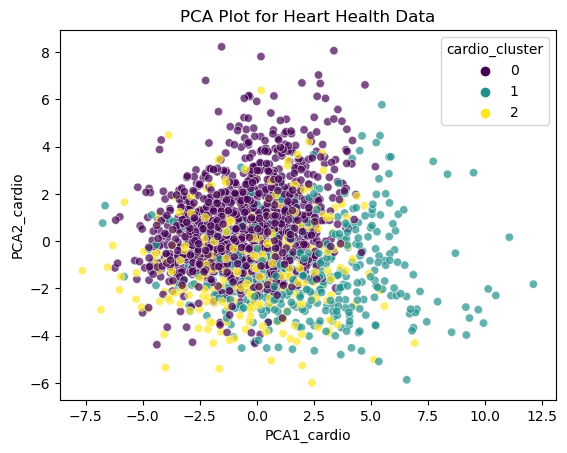

In [9]:
"""
Clusters include only blood pressure and cholesterol data for clusters at risk of
cardiovascular disease
"""
# removed cols: 'BPXOSY1','WTPH2YR','BPXODI1', 'BPXOSY2','BPXOSY3','BPXODI2','BPXODI3'
cardio_cols = ['SYSBP','DIABP','LBDHDD', 'LBXTC']

X_cardio = scaler.fit_transform(df_cleaned[cardio_cols])

cardio_gmm = GaussianMixture(n_components=3, random_state=42)
df_cleaned['cardio_cluster'] = cardio_gmm.fit_predict(X_cardio)
pca = PCA(n_components=2)
df_cleaned['PCA1_cardio'] = X_pca[:, 0]
df_cleaned['PCA2_cardio'] = X_pca[:, 1]

sns.scatterplot(
    data=df_cleaned,
    x='PCA1_cardio', y='PCA2_cardio',
    hue='cardio_cluster',
    palette='viridis', alpha=0.7
).set_title('PCA Plot for Heart Health Data')

In [10]:
# evaluating the clusters
silhouette = silhouette_score(X_cardio, gmm.fit_predict(X_cardio))
db_index = davies_bouldin_score(X_cardio, gmm.fit_predict(X_cardio))
print("Silhouette Score: ", silhouette)
print("Davies Bouldin Index: ", db_index)

Silhouette Score:  0.1416792459873246
Davies Bouldin Index:  1.5699914719795902


Text(0.5, 1.0, 'PCA Plot for Diabetes Risk Data')

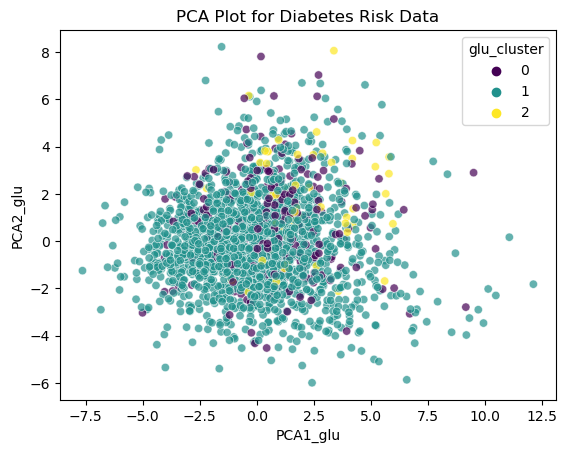

In [11]:
# Clustering with only blood glucose and glycohemoglobin levels


glu_cols = ['LBXGH', 'LBXGLU']
X_glu = scaler.fit_transform(df_cleaned[glu_cols])

glu_gmm = GaussianMixture(n_components=3, random_state=42)
df_cleaned['glu_cluster'] = glu_gmm.fit_predict(X_glu)
pca = PCA(n_components=2)
df_cleaned['PCA1_glu'] = X_pca[:, 0]
df_cleaned['PCA2_glu'] = X_pca[:, 1]

sns.scatterplot(
    data=df_cleaned,
    x='PCA1_glu', y='PCA2_glu',
    hue='glu_cluster',
    palette='viridis', alpha=0.7
).set_title('PCA Plot for Diabetes Risk Data')

In [12]:
# evaluating the clusters
silhouette = silhouette_score(X_glu, gmm.fit_predict(X_glu))
db_index = davies_bouldin_score(X_glu, gmm.fit_predict(X_glu))
print("Silhouette Score: ", silhouette)
print("Davies Bouldin Index: ", db_index)

Silhouette Score:  0.3147594634232728
Davies Bouldin Index:  1.1473680281270429


Text(0.5, 1.0, 'PCA Plot for Body Measurement Data')

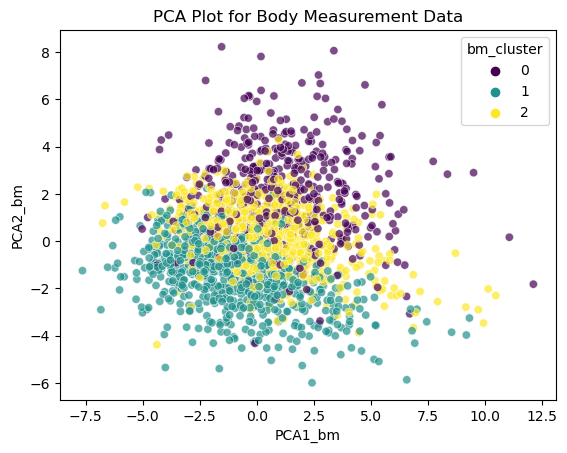

In [13]:
# Clusters only include body measurement data

bm_cols = ['BMXBMI','BMXHIP','BMXHT','BMXWAIST','BMXWT']
X_bm = scaler.fit_transform(df_cleaned[bm_cols])

bm_gmm = GaussianMixture(n_components=3, random_state=42)
df_cleaned['bm_cluster'] = bm_gmm.fit_predict(X_bm)
pca = PCA(n_components=2)
df_cleaned['PCA1_bm'] = X_pca[:, 0]
df_cleaned['PCA2_bm'] = X_pca[:, 1]

sns.scatterplot(
    data=df_cleaned,
    x='PCA1_bm', y='PCA2_bm',
    hue='bm_cluster',
    palette='viridis', alpha=0.7
).set_title('PCA Plot for Body Measurement Data')

In [14]:
# evaluating the clusters
silhouette = silhouette_score(X_bm, gmm.fit_predict(X_bm))
db_index = davies_bouldin_score(X_bm, gmm.fit_predict(X_bm))
print("Silhouette Score: ", silhouette)
print("Davies Bouldin Index: ", db_index)

Silhouette Score:  0.2022684756899365
Davies Bouldin Index:  1.1210835352697994


Seems like the body measurements and BMI columns resulted in slightly more separated clusters. We explain this later, but it makes sense because there are many different combinations that can occur within an individual (health profiles may not be clustered neatly). 

In [15]:
df_cleaned.info(), df_cleaned.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2017 entries, 0 to 2016
Data columns (total 59 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Unnamed: 0      2017 non-null   float64
 1   SEQN            2017 non-null   float64
 2   RIAGENDR        2017 non-null   float64
 3   RIDAGEYR        2017 non-null   float64
 4   DMDEDUC2        2017 non-null   float64
 5   INDFMPIR        2017 non-null   float64
 6   BMXBMI          2017 non-null   float64
 7   BMXHIP          2017 non-null   float64
 8   BMXHT           2017 non-null   float64
 9   BMXWAIST        2017 non-null   float64
 10  BMXWT           2017 non-null   float64
 11  BPXOSY1         2017 non-null   float64
 12  BPXOSY2         2017 non-null   float64
 13  BPXOSY3         2017 non-null   float64
 14  BPXODI1         2017 non-null   float64
 15  BPXODI2         2017 non-null   float64
 16  BPXODI3         2017 non-null   float64
 17  SYSBP           2017 non-null   f

(None,
    Unnamed: 0      SEQN  RIAGENDR  RIDAGEYR  DMDEDUC2  INDFMPIR  BMXBMI  \
 0         0.0  130378.0       1.0      43.0       5.0      5.00    27.0   
 1         1.0  130379.0       1.0      66.0       5.0      5.00    33.5   
 2         2.0  130380.0       2.0      44.0       3.0      1.41    29.7   
 3         3.0  130386.0       1.0      34.0       4.0      1.33    30.2   
 4         4.0  130394.0       1.0      51.0       5.0      5.00    24.4   
 
    BMXHIP  BMXHT  BMXWAIST  ...      PCA2  cardio_cluster  PCA1_cardio  \
 0   102.9  179.5      98.3  ... -0.087764               2     3.690845   
 1   112.4  174.2     114.7  ...  1.566399               0     0.691817   
 2    98.0  152.9      93.5  ...  0.942918               0    -0.371162   
 3   110.6  173.3     106.1  ...  0.725724               0    -0.322575   
 4    99.4  177.3      92.1  ...  0.348996               0    -1.661927   
 
    PCA2_cardio  glu_cluster  PCA1_glu  PCA2_glu  bm_cluster   PCA1_bm  \
 0    -0.

In [16]:
df_clustered = df_cleaned.copy()
df_clustered = df_clustered.rename(columns={
    "RIAGENDR": "Gender",
    "RIDAGEYR": "Age",
    "INDFMPIR": "Income",
    "BMXBMI": "BMI",
    "BMXWAIST": "Waist",
    "BMXHT": "Height"
})

# Getting mean values for each cluster
cluster_summary = df_clustered.groupby("Cluster")[["Gender", "Age", "Income", "BMI", "Waist", "Height", "SYSBP", "DIABP"]].mean().reset_index()

cluster_summary.head()

,Cluster,Gender,Age,Income,BMI,Waist,Height,SYSBP,DIABP
0,0,1.623853,49.119266,2.911101,34.560550,107.527523,166.149541,122.403670,76.775229
1,1,1.692641,49.709957,3.440476,25.893506,90.864935,165.352381,115.716450,71.500000
2,2,1.656000,54.288000,3.027840,34.820000,110.893600,166.725600,126.512000,78.772000
3,3,1.625498,62.482072,3.349183,28.375299,98.510359,165.719920,124.807769,71.721116
4,4,1.387387,54.621622,2.863243,31.816216,108.449550,169.350450,121.427928,74.175676


### Disclaimer

Due to the nature of our clusters, the following analyses does not accurately reflect real world patterns or occurrences. The analyses we've conducted only occur in the context of the dataset and do not intend to inform public health policy.

# **Cluster Insights Summary**
 
 Our unsupervised clustering revealed health-related profiles based on body morphology, demographics and vital signs within the merged NHANES dataset. These clusters highlight variation across age, gender distribution, BMI, waist circumference, income level, and blood pressure; offering a more nuanced view of health risk profiles beyond traditional BMI categorizations. However, these are not definitive profiles and require further academic and healthcare research to determine if they are prevalent among a larger population.  

**Cluster 0:  Older, High-Risk Males with Central Obesity**

* Gender: Predominantly male
* Average Age: 54.8 years
* Income Level: Moderate
* BMI: 34.6 (Obese)
* Waist Circumference: ~112 cm
* Blood Pressure (SYS/DIAS): 121 / 74

This group represents older individuals with high BMI and waist circumference, indicating significant risk for obesity-related conditions.


**Cluster 1: Middle-Aged Males with Elevated BMI**

* Gender: Predominantly male
* Average Age: 49.8 years
* Income Level: Lower-middle
* BMI: 31.4 (Obese)
* Waist Circumference: ~104 cm
* Blood Pressure: 124.6 / 75.4

Slightly younger than Cluster 0, these individuals still fall in the obese category with similarly concerning waist measurements and blood pressure.


**Cluster 2:  Younger, Healthier Individuals with Higher Socioeconomic Status**
* Gender: Majority male
* Average Age: 39.6 years (Youngest)
* Income Level: Highest among clusters
* BMI: 26.7 (Overweight)
* Waist Circumference: ~93 cm
* Blood Pressure: 114 / 71

This cluster demonstrates a relatively healthier profile: younger age, lower BMI, healthier blood pressure, and the tallest average height; suggesting lower overall metabolic risk.


**Cluster 3:  Middle-Aged to Older Males with Elevated Health Markers**
* Gender: Most male-dominated group
* Average Age: 51.8 years
* Income Level: Moderate
* BMI: 32.3 (Obese)
* Waist Circumference: ~104 cm
* Blood Pressure: 118.6 / 76.2

These individuals show signs of elevated obesity and blood pressure, placing them in a moderate-to-high health risk category.


**Cluster 4: Older Adults with Lower BMI and Better Vitals**
* Gender: Predominantly male
* Average Age: 54.9 years (Oldest group)
* Income Level: Relatively high
* BMI: 26.7 (Overweight, not obese)
* Waist Circumference: ~94 cm
* Blood Pressure: 122.1 / 73.2

Despite being in the same age range as Cluster 0, this group exhibits significantly lower BMI and healthier measurements, potentially representing a resilient older population with better health maintenance.

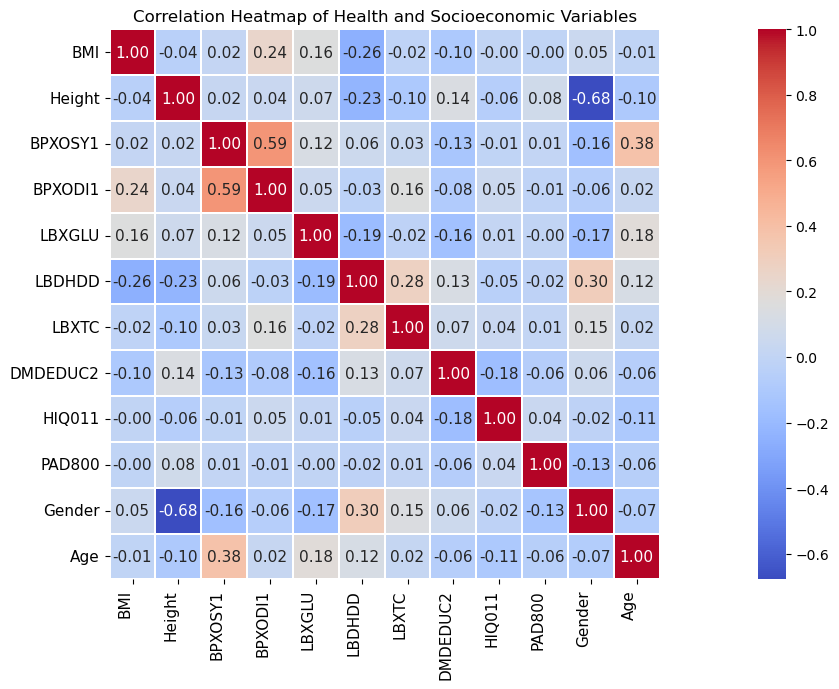

In [17]:
# Changing the column names based on the available columns in df_clustered
selected_cols = [
    'BMI', 'Height', 'BPXOSY1', 'BPXODI1', 'LBXGLU', 'LBDHDD', 'LBXTC',
    'Income to poverty ratio', 'DMDEDUC2', 'HIQ011', 'PAD800', 'Gender', 'Age'  # Updated column names
]

existing_cols = [col for col in selected_cols if col in df_clustered.columns]

corr = df_clustered[existing_cols].corr()

plt.figure(figsize=(20, 7)) 

sns.heatmap(corr,
            annot=True,             
            fmt=".2f",              
            cmap="coolwarm",         
            cbar=True,                
            square=True,             
            linewidths=0.3,          
            annot_kws={"size": 11})   

plt.title("Correlation Heatmap of Health and Socioeconomic Variables", fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()

## Key Findings:

Education and Income (0.48 correlation): As expected, higher education levels are moderately correlated with higher income. This aligns with existing socioeconomic research and validates our data.

Education & Health: Negative correlation between education and BMI (-0.10) and diastolic BP (-0.08) suggests individuals with higher education may be at lower risk for obesity and high blood pressure. Similarly, education has a positive correlation with HDL (good cholesterol) (0.13) and physical activity (0.06).

Income & Health: Income correlates positively with HDL (0.09) and negatively with BMI (-0.06) and blood pressure — potentially indicating better health among higher-income individuals. Low to moderate correlation, but consistent with socioeconomic health disparities.

Gender & Height (-0.68): A strong negative correlation reflects that males (typically coded as 1) tend to be taller than females (coded as 2).

Age & Blood Pressure (0.38): Age strongly correlates with systolic blood pressure, as expected with aging physiology.

BMI & HDL (-0.26): Negative correlation suggests that higher BMI is often associated with lower levels of protective cholesterol.

### To better understand the socioeconomic and healthcare dimensions of each health profile, we stratified the six clusters by income level, education, BMI, and insurance access.

In [18]:
# Renaming variables
# Check if the columns exist in df_clustered before renaming
df_clustered = df_clustered.rename(columns={
    "INDFMPIR": "Income",
    "DMDEDUC2": "Education",
    "BMXBMI": "BMI",
    "HIQ011": "Insurance",
    "Cluster": "Cluster"
})

# Ensure the renamed columns exist in df_clustered
if all(col in df_clustered.columns for col in ["Income", "Education", "BMI", "Insurance"]):
    # Group by cluster and calculate mean income, education, BMI, and insurance access
    cluster_summary = df_clustered.groupby("Cluster")[["Income", "Education", "BMI", "Insurance"]].mean().reset_index()

    # Convert insurance to % insured per cluster if needed
    df_clustered["Insured"] = df_clustered["Insurance"].apply(lambda x: 1 if x == 1 else 0)
    insurance_rate = df_clustered.groupby("Cluster")["Insured"].mean().reset_index(name="Percent_Insured")

    # Merge summaries
    cluster_summary = pd.merge(cluster_summary, insurance_rate, on="Cluster")

    print("Cluster Stratification Summary:")
    print(cluster_summary)
else:
    print("Required columns are missing in the dataframe.")

Cluster Stratification Summary:
   Cluster    Income  Education        BMI  Insurance  Percent_Insured
0        0  2.911101   3.788991  34.560550   1.018349         0.981651
1        1  3.440476   4.411255  25.893506   1.047619         0.952381
2        2  3.027840   4.032000  34.820000   1.016000         0.984000
3        3  3.349183   4.123506  28.375299   1.033865         0.966135
4        4  2.863243   3.450450  31.816216   1.072072         0.927928
5        5  3.189744   4.006390  28.892652   1.057508         0.942492


Insights:

- Cluster 4 stands out with the lowest education and the lowest insurance rate (92.8%) despite a high BMI of 31.8, possibly indicating a vulnerable group. 

- Clusters 0 and 2 show highest BMIs (~34.5+) and high insurance coverage (98%+), but still carry elevated obesity risk.

- Cluster 1 has the lowest BMI (25.9), highest education, and highest income, suggesting a comparatively low-risk, high-resource group. 

There is a clear gradient of social advantage when comparing education/income against BMI and insurance access across clusters.

Cluster 0 and 2 show high BMI but relatively lower income and education, which may indicate populations at greater risk of obesity and potentially with less access to health education or preventive care.

Cluster 1 has lower BMI and higher income and education, suggesting a potentially healthier or more advantaged group.

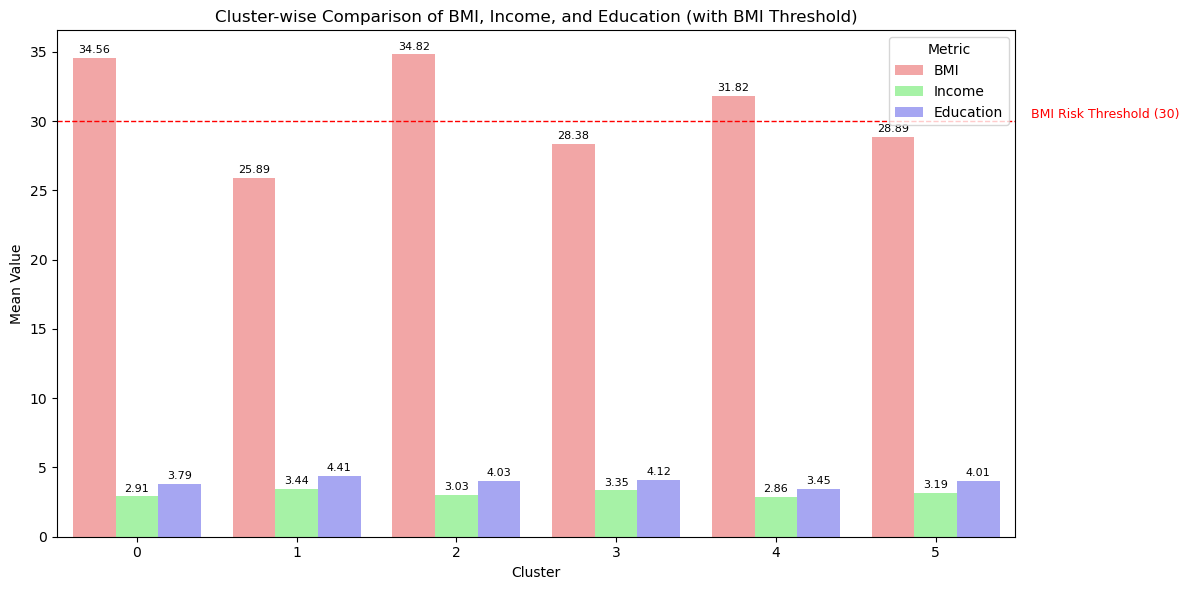

In [20]:
# Melt the dataframe for easier plotting
df_melted = cluster_summary.melt(id_vars='Cluster', value_vars=['BMI', 'Income', 'Education'],
                                 var_name='Metric', value_name='Value')

palette = {"BMI": "#FF9999", "Income": "#99FF99", "Education": "#9999FF"}

# Creating bar plot for comparison
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=df_melted, x='Cluster', y='Value', hue='Metric', palette=palette)

for container in ax.containers:
    ax.bar_label(container, fmt='%.2f', label_type='edge', fontsize=8, padding=2)

# Add threshold line for BMI
plt.axhline(y=30, color='red', linestyle='--', linewidth=1)
plt.text(len(cluster_summary) - 0.5, 30.2, '    BMI Risk Threshold (30)', color='red', fontsize=9)

plt.ylabel("Mean Value")
plt.title("Cluster-wise Comparison of BMI, Income, and Education (with BMI Threshold)")
plt.legend(title="Metric")
plt.tight_layout()
plt.show()

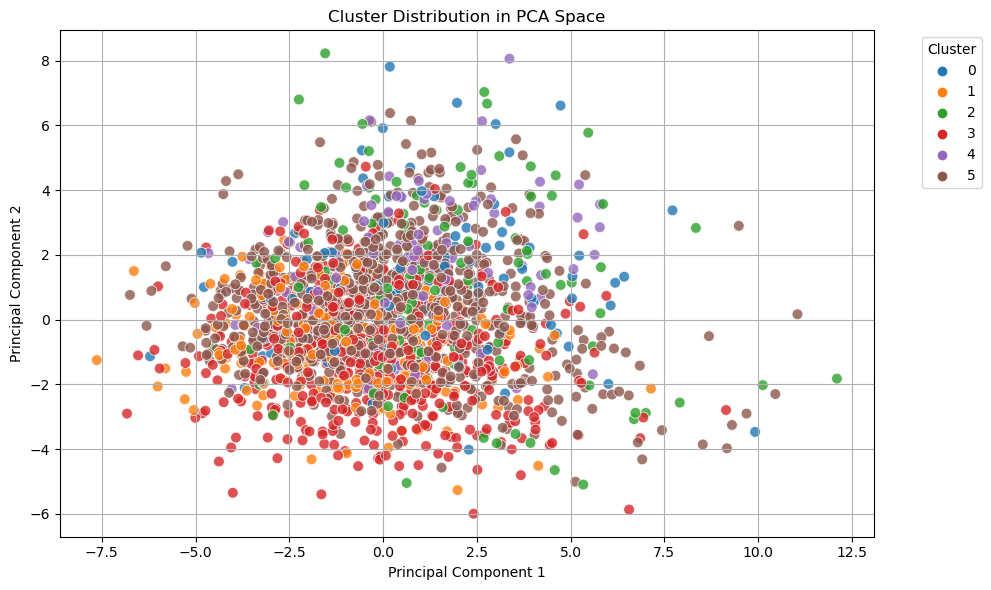

In [22]:

# Ensure the relevant PCA columns and cluster labels exist
if {'PCA1', 'PCA2', 'Cluster'}.issubset(df_clustered.columns):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_clustered, x='PCA1', y='PCA2', hue='Cluster', palette='tab10', s=60, edgecolor='w', alpha=0.8)
    plt.title('Cluster Distribution in PCA Space')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)
    plt.tight_layout()
    plt.show()
else:
    print("Required columns ('PCA1', 'PCA2', 'Cluster') are missing from df_clustered.")


moderate overlap between clusters, which is common in health datasets where boundaries are fuzzy. Some color concentration exists, indicating that there is underlying structure, but it’s not perfectly separable. That’s OK,  human health is complex and doesn't fall into perfect categories.

We want to try t-SNE instead of PCA for better nonlinear structure, especially if separation remains unclear.

/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:780: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/anaconda3/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:790: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


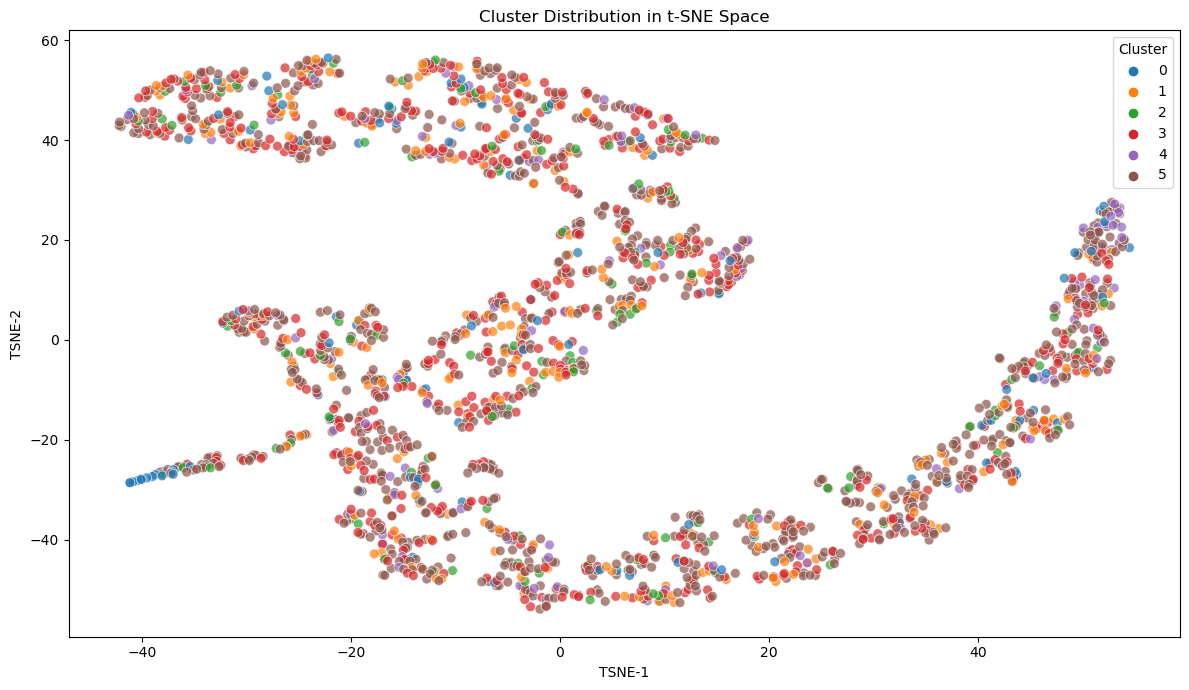

In [23]:
from sklearn.manifold import TSNE

# Dropping non-numeric and unnecessary columns
features = df_clustered.select_dtypes(include='number').drop(columns=['Cluster'], errors='ignore')

# Applying t-SNE and adding results to the dataframe
tsne = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=1000)
tsne_results = tsne.fit_transform(features)

df_clustered['TSNE-1'] = tsne_results[:, 0]
df_clustered['TSNE-2'] = tsne_results[:, 1]

# Plotting t-SNE
plt.figure(figsize=(12, 7))
sns.scatterplot(data=df_clustered, x='TSNE-1', y='TSNE-2', hue='Cluster', palette='tab10', s=50, alpha=0.7)
plt.title('Cluster Distribution in t-SNE Space')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


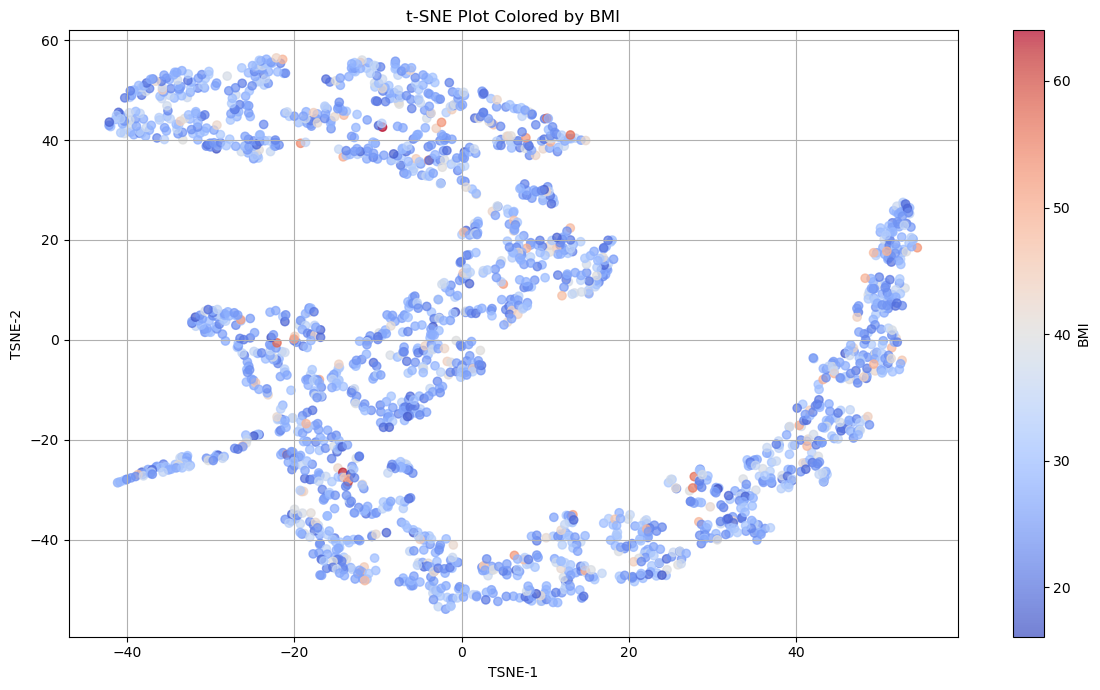

In [24]:
plt.figure(figsize=(12, 7))
scatter = plt.scatter(
    df_clustered["TSNE-1"], 
    df_clustered["TSNE-2"], 
    c=df_clustered["BMI"],
    cmap="coolwarm",
    alpha=0.7
)
plt.colorbar(scatter, label="BMI")
plt.title("t-SNE Plot Colored by BMI")
plt.xlabel("TSNE-1")
plt.ylabel("TSNE-2")
plt.grid(True)
plt.tight_layout()
plt.show()

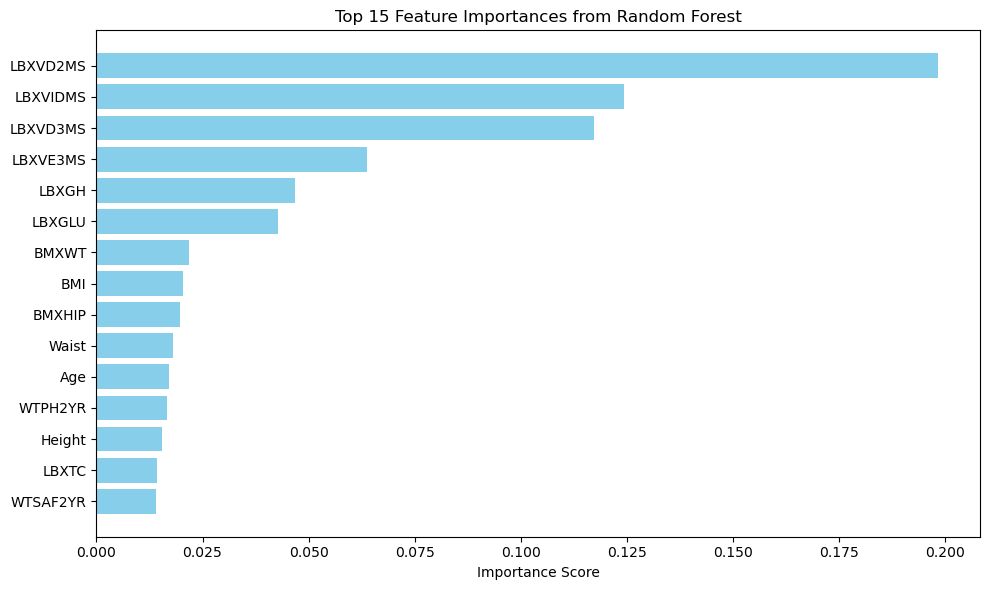

In [25]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

df_shap = df_clustered.dropna(subset=['Cluster'])

# Converting non-numeric columns to numeric using encoding or dropping
non_numeric_cols = df_shap.select_dtypes(include=['object']).columns

# Applying encoding to non-numeric columns
df_shap[non_numeric_cols] = df_shap[non_numeric_cols].apply(lambda col: col.astype('category').cat.codes)

# Separating features and target, dropping unnecessary columns
features = df_shap.drop(columns=['Cluster', 'glu_cluster', 'PCA2', 'PCA2_cardio', 'PCA2_glu', 'PCA2_bm', 
'TSNE-1'])
target = df_shap['Cluster']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Calculating and plot feature importances
importances = rf_model.feature_importances_
feature_names = X_train.columns

importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).head(15)

plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'], importance_df['Importance'], color='skyblue')
plt.xlabel("Importance Score")
plt.title("Top 15 Feature Importances from Random Forest")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

## Statistical inference to identify potential causal relationships between health indicators and lifestyle factors.

To further investigate the potential causal relationships between lifestyle and demographic data with health indicators, we wanted to look at the effect of insurance status on health. The four demographic variables we identified as covariates (which may impact the treatment) are family income-to-poverty ratio, age, level of education and gender. 

In [26]:
# Propensity score matching  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import NearestNeighbors
from scipy import stats
import statsmodels.api as sm

# Extracting covariates from data
cov_var = df_cleaned[['INDFMPIR', 'RIDAGEYR', 'DMDEDUC2', 'RIAGENDR']]
cov_var = sm.add_constant(cov_var)
df_cleaned['insured'] = (df_cleaned['HIQ011'] == 1).astype(int)
prop_model = sm.Logit(df_cleaned['insured'], cov_var).fit(disp=0)
df_cleaned['propensity_score'] = prop_model.predict(cov_var)

treated = df_cleaned[df_cleaned['insured'] == 1]
control = df_cleaned[df_cleaned['insured'] == 0]

# Using nearest neighors to match treated individuals with untreated individuals
nn = NearestNeighbors(n_neighbors=1).fit(control[['propensity_score']])
dist, idx = nn.kneighbors(treated[['propensity_score']])
matched_control = control.iloc[idx.flatten()]
matched_df = pd.concat([treated, matched_control])

# Results after matching
print("Covariate balance after matching:")
for col in ['RIDAGEYR', 'INDFMPIR', 'DMDEDUC2']:
    diff = treated[col].mean() - matched_control[col].mean()
    std_diff = diff / treated[col].std()
    print(f"{col}: ", round(std_diff, 3))

t_stat, p_val = stats.ttest_ind(treated['LBXGH'], matched_control['LBXGH'], equal_var=False)
print("\nHbA1c difference: ", round(treated['LBXGH'].mean() - matched_control['LBXGH'].mean(), 2))
print(f"p-value: {p_val:.4f}")

Covariate balance after matching:
RIDAGEYR:  0.155
INDFMPIR:  0.001
DMDEDUC2:  -0.11

HbA1c difference:  -0.19
p-value: 0.0000


After conducting propensity score matching for glycohemoglobin (HbA1c) there was a slight difference in glucose levels for insured individuals versus uninsured. 

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=d6d89c8e-51ab-46c7-bd52-4e9c790ef012' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>